# Data Cleaning for movies data

The whole purpose of this notebook is to clean data of movies data.
The steps for cleaning are as above:

## Clean columns
- Convert released into released_date and released_place
- Check duplicated values

## Fill in null values

1. **Fill "Others" for Object columns**: rating, released_place, writer, star, country, company
2. **Fill with 0 for float64 columns**: score, votes, runtime
3. **Fill with np.mean for columns**: budget, gross
4. **Fill with "0000-00-00" for column**: released_date

Then we will save the cleaned data file as csv

This notebook is based on [DAKKATA's notebook](https://www.kaggle.com/code/dakkatadigvijayreddy/exploratory-data-analysis-in-the-movie-industry/notebook#5.Data-Cleaning)

In [35]:
# Core libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
%matplotlib inline

# Terminate Warnings
warnings.filterwarnings("ignore",category=FutureWarning)

# Set Maximum Columns To be Display In DataFrame As 20.
pd.set_option("display.max_columns",20)
plt.style.use('seaborn')

df = pd.read_csv(r'Data\movies.csv')

plt.rcParams["font.weight"]           = "bold"
plt.rcParams["axes.labelweight"]      = "bold"
plt.rcParams["axes.titlesize"]        =  25
plt.rcParams["axes.titleweight"]      = "bold"
plt.rcParams["xtick.labelsize"]       =  15
plt.rcParams["ytick.labelsize"]       =  15
plt.rcParams["axes.labelsize"]        =  20
plt.rcParams["legend.fontsize"]        =  15
plt.rcParams["legend.title_fontsize"] =  15

C:\Users\duong\AppData\Local\Temp\ipykernel_14772\1939709687.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# 1. Creating a copy of our dataset
df2 = df.copy()
df2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
#2. Split 'released' into 'released_date' and 'released_place'
y = df2['released'].str.replace(")","").str.split("(",expand=True).rename(columns={0:'released_date',1:'released_place'})

In [6]:
#3. Add 'released_date' and 'released_place' into df
df2.insert(4,'released_date',y['released_date'])
df2.insert(5,'released_place',y['released_place'])

In [7]:
# 4. Drop 'released' column
df2.drop(['released'],axis=1,inplace=True)

In [8]:
# 5. Convert released_date into datetime dtype
df2['released_date'] = df2['released_date'].astype(str).astype('datetime64')
df2.head(2)

,name,rating,genre,year,released_date,released_place,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,United States,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,United States,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


In [9]:
# 6. Check duplicated rows
df2.duplicated().value_counts() #True means duplicate rows.

False    7668
dtype: int64

# Filling null values

In [10]:
# 7. Check null values
df2.isna().sum().sort_values(ascending=False)

budget            2171
gross              189
rating              77
company             17
runtime              4
score                3
votes                3
writer               3
country              3
released_date        2
released_place       2
star                 1
name                 0
genre                0
year                 0
director             0
dtype: int64

In [11]:
# 8. Check overall null
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            7668 non-null   object        
 1   rating          7591 non-null   object        
 2   genre           7668 non-null   object        
 3   year            7668 non-null   int64         
 4   released_date   7666 non-null   datetime64[ns]
 5   released_place  7666 non-null   object        
 6   score           7665 non-null   float64       
 7   votes           7665 non-null   float64       
 8   director        7668 non-null   object        
 9   writer          7665 non-null   object        
 10  star            7667 non-null   object        
 11  country         7665 non-null   object        
 12  budget          5497 non-null   float64       
 13  gross           7479 non-null   float64       
 14  company         7651 non-null   object        
 15  runt

# Tactics for filling null values
<div style="direction: ltr;">
	<table style="direction: ltr; border-collapse: collapse; border: 1pt solid #A3A3A3;" title="" border="1" summary="" cellspacing="0" cellpadding="0">
		<tbody>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<h3 style="margin: 0in; font-family: Calibri; font-size: 12.0pt; color: #5b9bd5;">#</h3>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<h3 style="margin: 0in; font-family: Calibri; font-size: 12.0pt; color: #5b9bd5;">Column</h3>
				</td>
				<td style="vertical-align: top; width: 1.2729in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<h3 style="margin: 0in; font-family: Calibri; font-size: 12.0pt; color: #5b9bd5;"><span lang="en-US">Non-Null</span><span lang="vi"> Count</span></h3>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<h3 style="margin: 0in; font-family: Calibri; font-size: 12.0pt; color: #5b9bd5;">Dtype</h3>
				</td>
				<td style="vertical-align: top; width: 1.0152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<h3 lang="vi" style="margin: 0in; font-family: Calibri; font-size: 12.0pt; color: #5b9bd5;">Fill null</h3>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">0</p>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">name</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7668</p>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">object</p>
				</td>
				<td style="vertical-align: top; width: .9104in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">&nbsp;</p>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">1</p>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">rating</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7591</p>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">object</p>
				</td>
				<td style="vertical-align: top; width: .9104in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p lang="vi" style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">Other</p>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">2</p>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">genre</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7668</p>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">object</p>
				</td>
				<td style="vertical-align: top; width: .9104in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">&nbsp;</p>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">3</p>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">year</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7668</p>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">int64</p>
				</td>
				<td style="vertical-align: top; width: .9104in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p lang="vi" style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">&nbsp;</p>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">4</p>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">released_date</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7666</p>
				</td>
				<td style="vertical-align: top; width: 1.1715in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">datetime64[ns]</p>
				</td>
				<td style="vertical-align: top; width: 1.1048in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p lang="vi" style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">0000-00-00</p>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">5</p>
				</td>
				<td style="vertical-align: top; width: 1.1562in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">released_place</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7666</p>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">object</p>
				</td>
				<td style="vertical-align: top; width: .8965in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p lang="vi" style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">Other</p>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">6</p>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">score</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7665</p>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">float64</p>
				</td>
				<td style="vertical-align: top; width: 1.1048in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p lang="vi" style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">Fill with 0</p>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7</p>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">votes</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7665</p>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">float64</p>
				</td>
				<td style="vertical-align: top; width: 1.1048in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p lang="vi" style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">Fill with 0</p>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">8</p>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">director</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7668</p>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">object</p>
				</td>
				<td style="vertical-align: top; width: .9104in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">&nbsp;</p>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">9</p>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">writer</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7665</p>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">object</p>
				</td>
				<td style="vertical-align: top; width: .9104in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p lang="vi" style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">Other</p>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">10</p>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">star</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7667</p>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">object</p>
				</td>
				<td style="vertical-align: top; width: .9104in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p lang="vi" style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">Other</p>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">11</p>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">country</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7665</p>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">object</p>
				</td>
				<td style="vertical-align: top; width: .9104in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p lang="vi" style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">Other</p>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">12</p>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">budget</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">5497</p>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">float64</p>
				</td>
				<td style="vertical-align: top; width: 1.209in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p lang="vi" style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">Fill with np.mean</p>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">13</p>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">gross</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7479</p>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">float64</p>
				</td>
				<td style="vertical-align: top; width: 1.209in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p lang="vi" style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">Fill with np.mean</p>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">14</p>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">company</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7651</p>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">object</p>
				</td>
				<td style="vertical-align: top; width: .9104in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p lang="vi" style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">Other</p>
				</td>
			</tr>
			<tr>
				<td style="vertical-align: top; width: .6673in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">15</p>
				</td>
				<td style="vertical-align: top; width: 1.1368in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">runtime</p>
				</td>
				<td style="vertical-align: top; width: 1.2534in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">7664</p>
				</td>
				<td style="vertical-align: top; width: 1.152in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">float64</p>
				</td>
				<td style="vertical-align: top; width: 1.1048in; padding: 4pt 4pt 4pt 4pt; border: 1pt solid #A3A3A3;">
					<p lang="vi" style="margin: 0in; font-family: Calibri; font-size: 11.0pt;">Fill with 0</p>
				</td>
			</tr>
		</tbody>
	</table>
</div>

## To sum up
1. Fill "Others" for Object columns: rating, released_place, writer, star, country, company
2. Fill with 0 for float64 columns: score, votes, runtime
3. Fill with np.mean for columns: budget, gross
4. Fill with "0000-00-00" for column: released_date

In [12]:
# 9. Fill "Others" for Object columns
columns_1 = ['rating','company','writer','country','released_place','star']
for i in columns_1:
    df2[i].fillna("Others",inplace=True)

df2.isna().sum().sort_values(ascending=False)

budget            2171
gross              189
runtime              4
score                3
votes                3
released_date        2
name                 0
rating               0
genre                0
year                 0
released_place       0
director             0
writer               0
star                 0
country              0
company              0
dtype: int64

In [13]:
# 10. Fill 0 for float64 columns
columns_2 = ['runtime','score','votes']
for j in columns_2:
    df2[j].fillna(0,inplace=True)

df2.isna().sum().sort_values(ascending=False)

budget            2171
gross              189
released_date        2
name                 0
rating               0
genre                0
year                 0
released_place       0
score                0
votes                0
director             0
writer               0
star                 0
country              0
company              0
runtime              0
dtype: int64

In [14]:
# 11. Fill np.mean for 'budget' and 'gross'
columns_3 = ['budget','gross']
for k in columns_3:
    df2[k].fillna(round(np.mean(df2[k])),inplace=True)

df2.isna().sum().sort_values(ascending=False)

released_date     2
name              0
rating            0
genre             0
year              0
released_place    0
score             0
votes             0
director          0
writer            0
star              0
country           0
budget            0
gross             0
company           0
runtime           0
dtype: int64

In [15]:
# 12. Fill 0000-00-00 for 'year' column
df2['released_date'].fillna('0000-00-00',inplace=True)

df2.isna().sum().sort_values(ascending=False)

name              0
rating            0
genre             0
year              0
released_date     0
released_place    0
score             0
votes             0
director          0
writer            0
star              0
country           0
budget            0
gross             0
company           0
runtime           0
dtype: int64

In [16]:
# 13. Recheck null values in dataset
df2.isna().sum().sort_values(ascending=False)[:-4].reset_index().rename(columns={"index":"columns",0:"Null_Values"})

,columns,Null_Values
0,name,0
1,rating,0
2,genre,0
3,year,0
4,released_date,0
5,released_place,0
6,score,0
7,votes,0
8,director,0
9,writer,0


In [17]:
# 14. Save cleaned dataset to csv
df2.to_csv("Cleaned_Movie_industry.csv")

# Data Analysis

Text(0.5, 1.0, 'Top 5 Highest Grossing Movies')

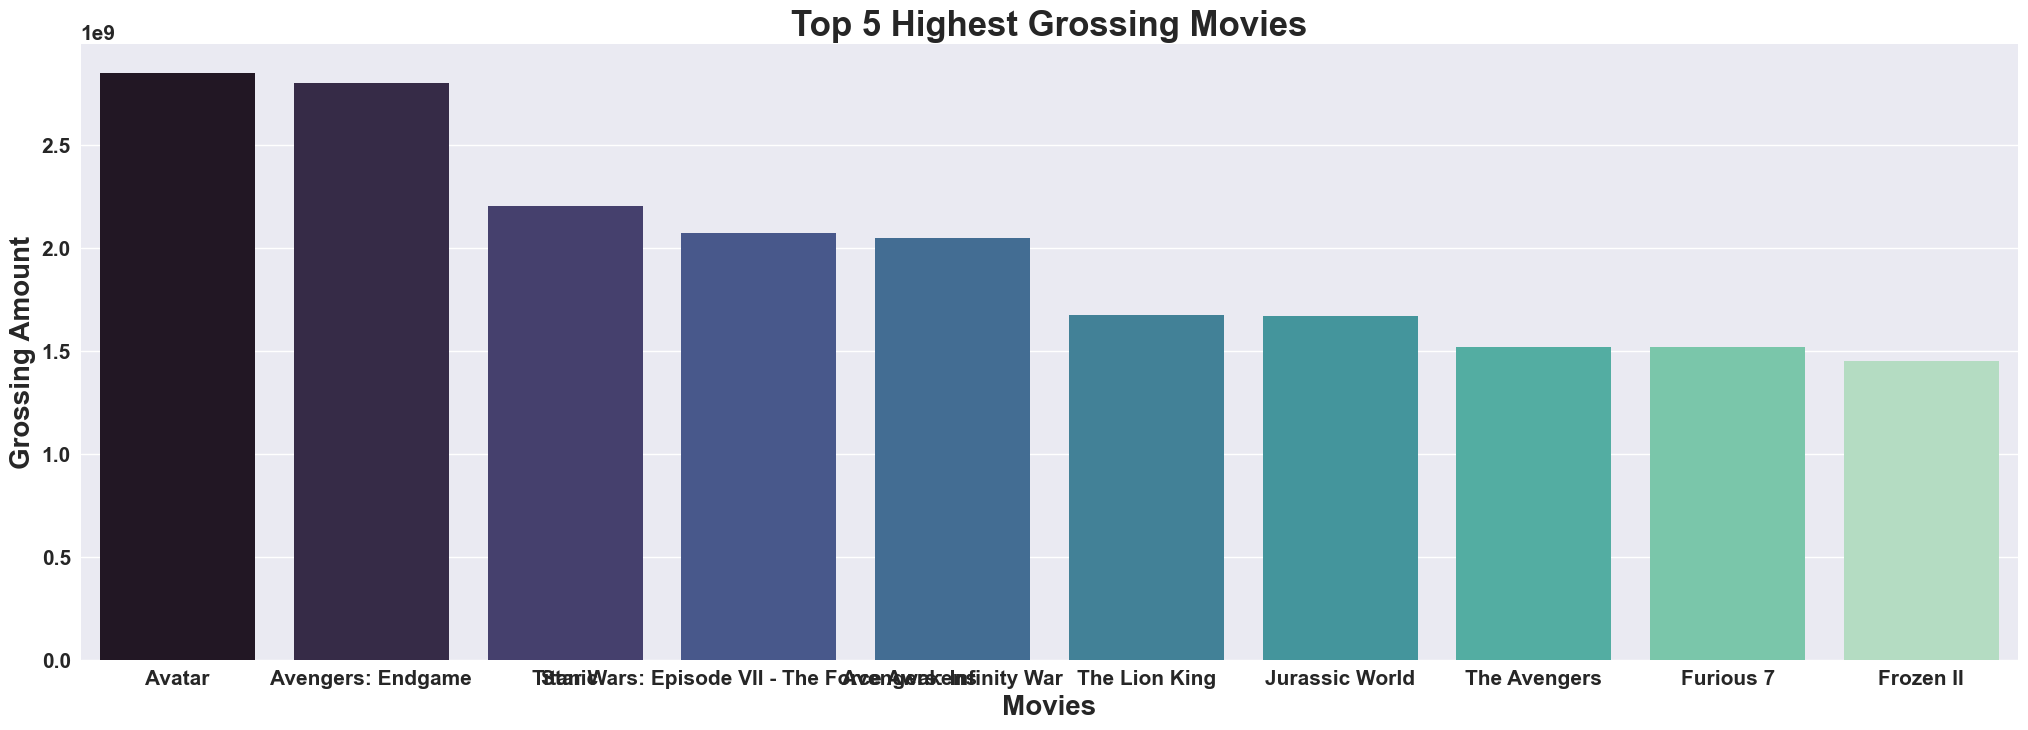

In [36]:
# 1. What are the top 10 highest grossing movies in the movie industry?

plt.figure(figsize=(25,8))
sns.barplot(x='name',y='gross',data=df2.sort_values(by='gross',ascending=False).head(10),palette='mako')
plt.xlabel('Movies')
plt.ylabel('Grossing Amount')
plt.title('Top 5 Highest Grossing Movies')

Avatar, Avengers: Endgame, Titanic, Star Wars VII, and Avengers: Infinity War are the top 5 highest grossing movies

Text(0.5, 1.0, 'The Most Popular Genres Of Movies')

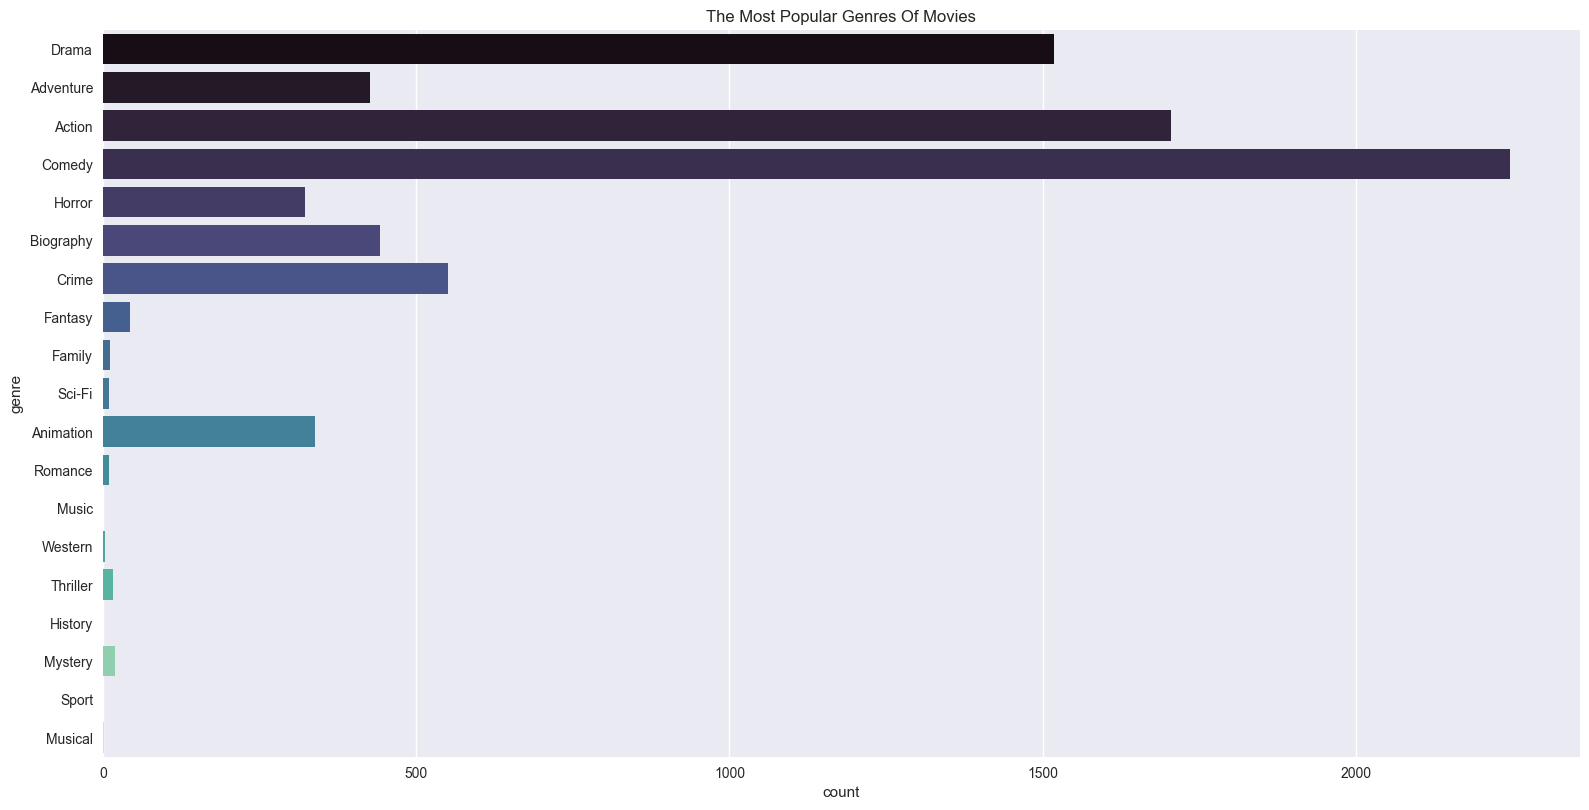

In [22]:
# 2. What are the most popular genres of movies?
	
sns.catplot(y='genre', kind='count', data=df2,height=8, aspect=2, palette='mako');
plt.title('The Most Popular Genres Of Movies')


Text(0.5, 1.0, 'Average Budget Of Each Genre')

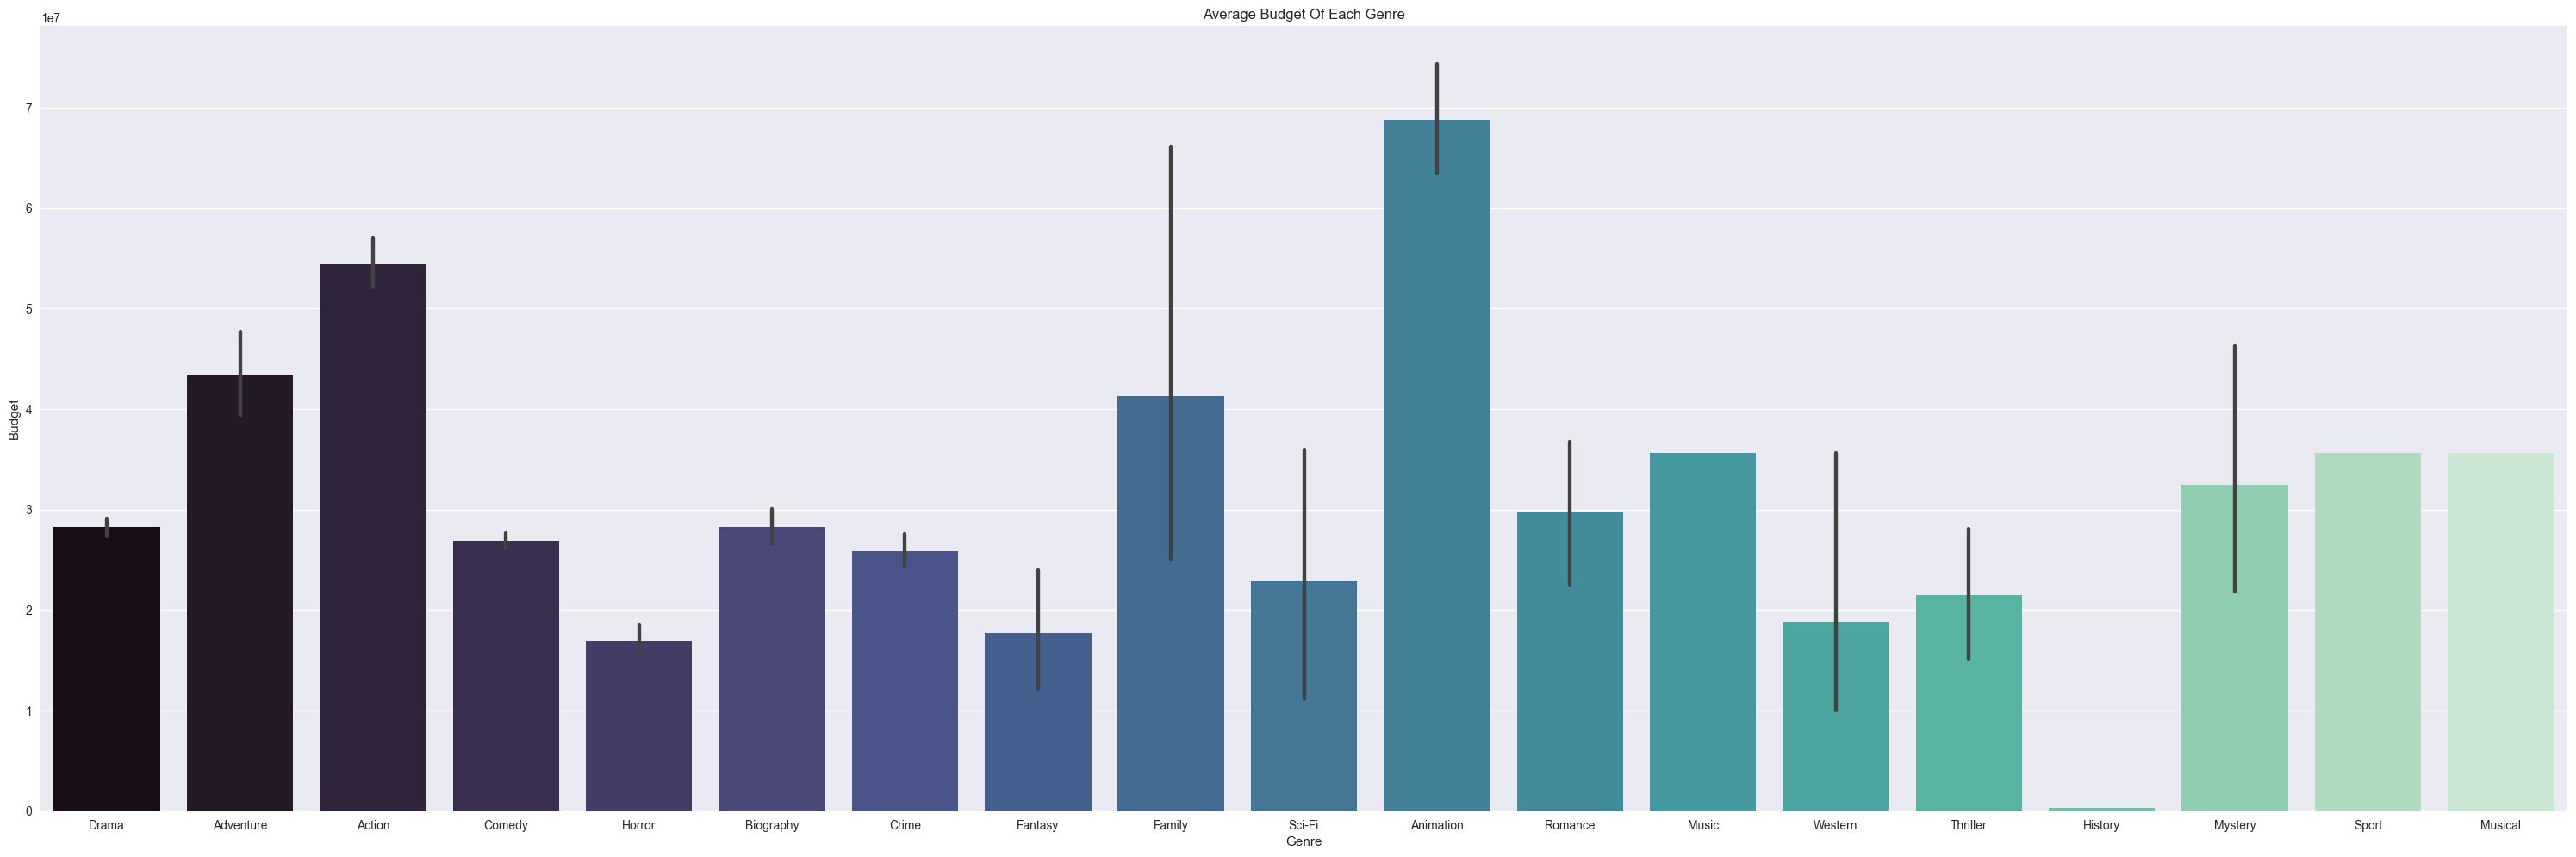

In [31]:
# 3. What is the average budget of each genre?
	
# Plot bar chart with average budget of each genre
sns.catplot(x='genre', y='budget', kind='bar', data=df2, height=10, aspect=3, palette='mako')
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.title('Average Budget Of Each Genre')

Text(0.5, 1.0, 'Average Gross Of Each Genre')

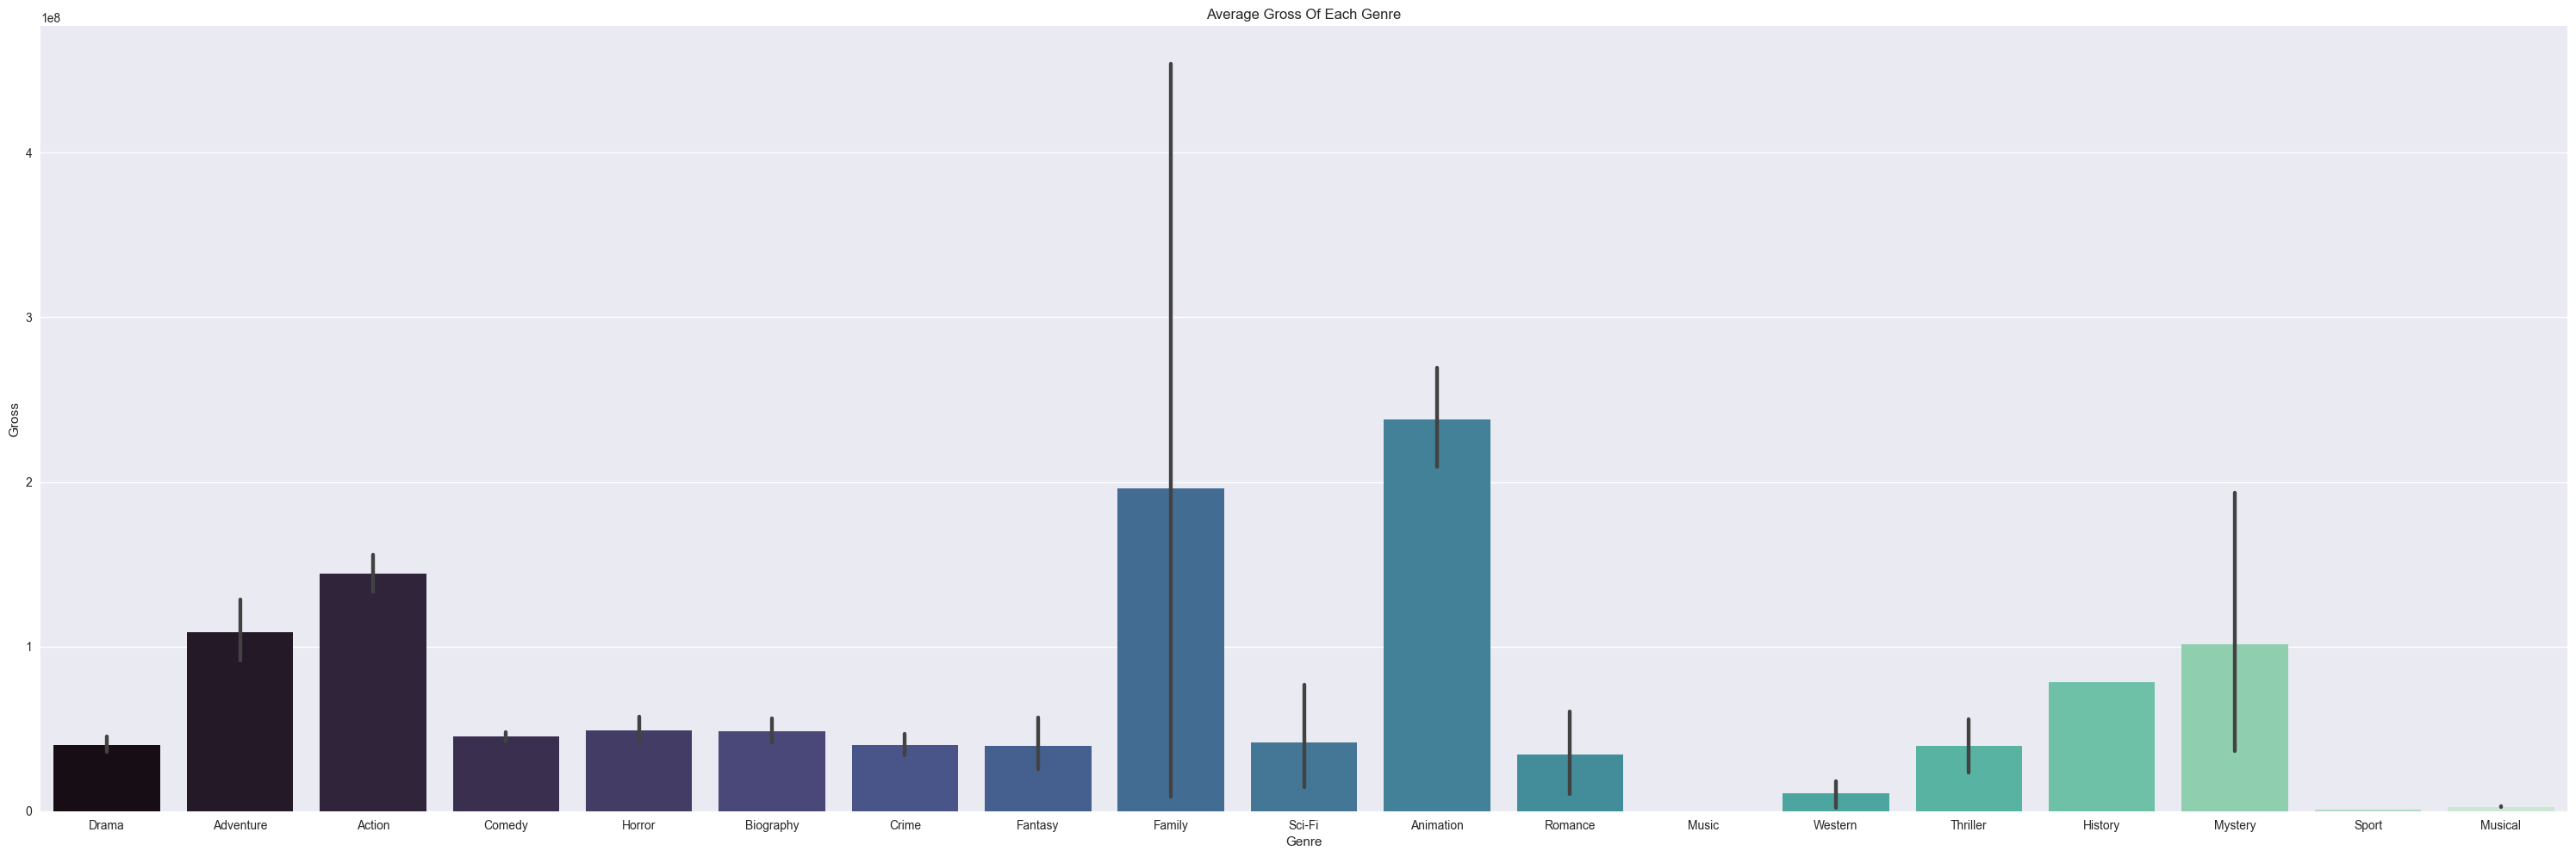

In [32]:
# 4. What is the average gross of each genre? 
	
# Plot bar chart with average budget of each genre
sns.catplot(x='genre', y='gross', kind='bar', data=df2, height=10, aspect=3, palette='mako')
plt.xlabel('Genre')
plt.ylabel('Gross')
plt.title('Average Gross Of Each Genre')

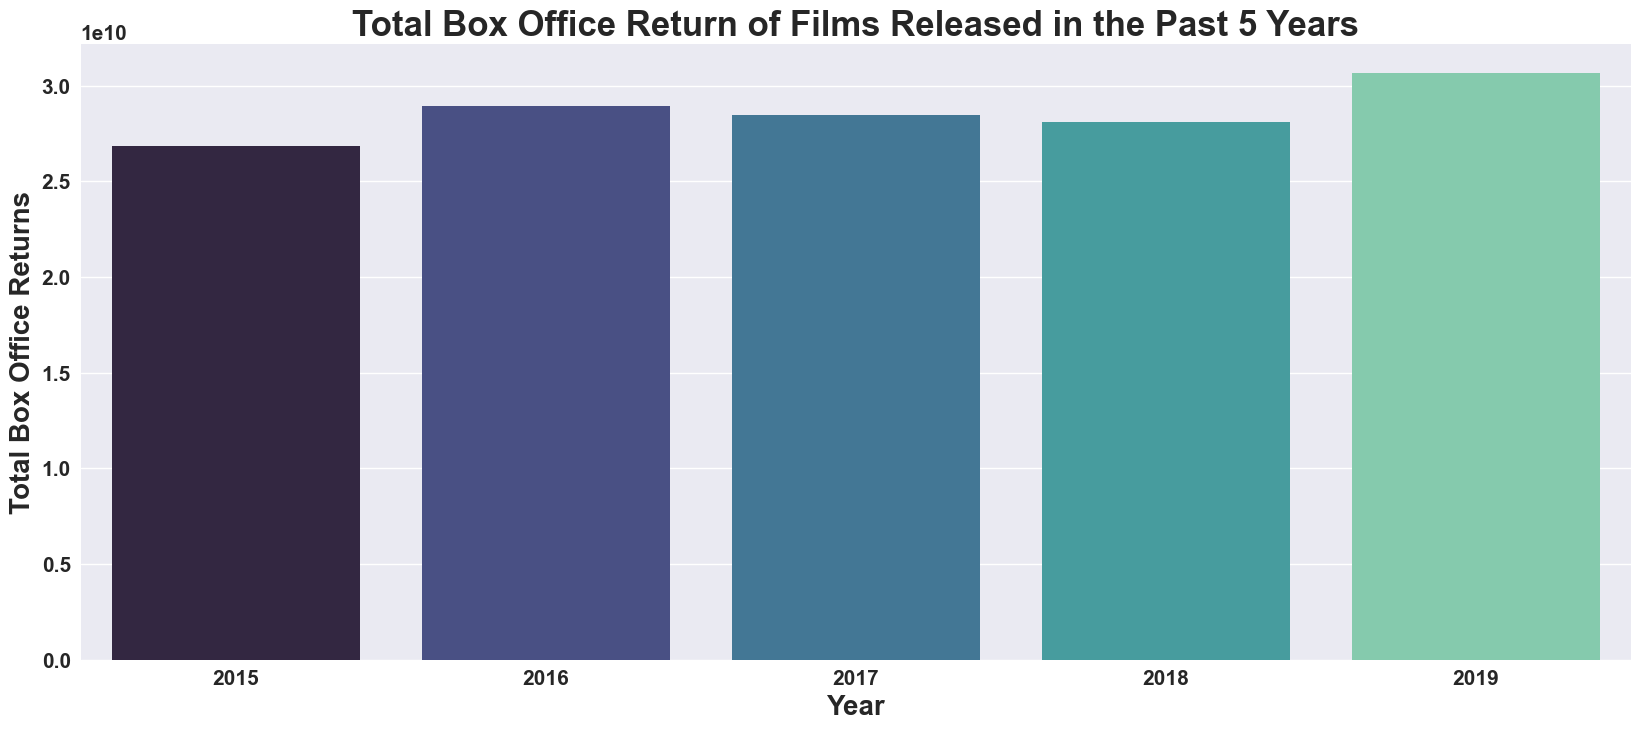

In [37]:
# 5. What is the total box office return of films released in the past 5 years?

# 1. Đầu tiên, tạo bảng data riêng, với cột year và sum gross từng năm
data = df2.groupby('year')['gross'].agg({'sum'}).sort_values(by='year',ascending = False)[1:6].reset_index().rename(columns={'sum':'total_box_office_returns'})

# 2. Plot dựa trên data đó

plt.figure(figsize=(20,8))
sns.barplot(x="year", y="total_box_office_returns", data=data, palette="mako")
plt.xlabel('Year')
plt.ylabel('Total Box Office Returns')
plt.title("Total Box Office Return of Films Released in the Past 5 Years")
plt.show()

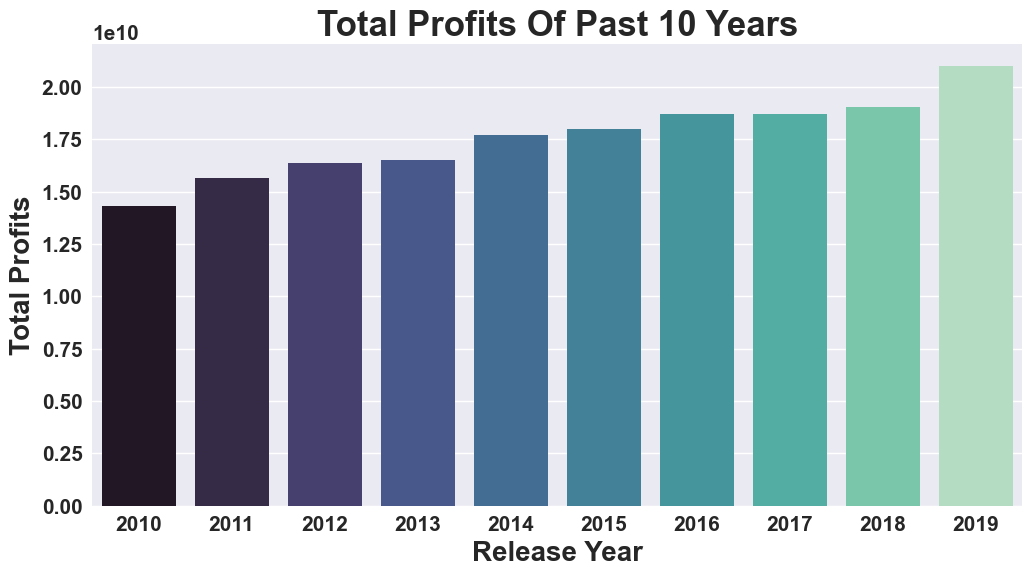

In [41]:
# 6. Total profits of past 10 years in movie industry?

# 1. Tính profit = gross - budget
df2['profit'] = df2['gross']-df2['budget']

# 2. Tạo bảng data riêng, với cột year và sum profit từng năm
df_profit = df2.groupby('year')['profit'].sum().reset_index().sort_values(by ='year',ascending=False).rename(columns={'profit':'total_profits'})[1:11]

# 3. Plot data dựa trên đó
plt.figure(figsize=(12,6))
sns.barplot(x='year', y='total_profits', data=df_profit, palette='mako')
plt.xlabel('Release Year')
plt.ylabel('Total Profits')
plt.title('Total Profits Of Past 10 Years')
plt.show()

Text(0.5, 1.0, 'Top 10 Highest Viewership Movies')

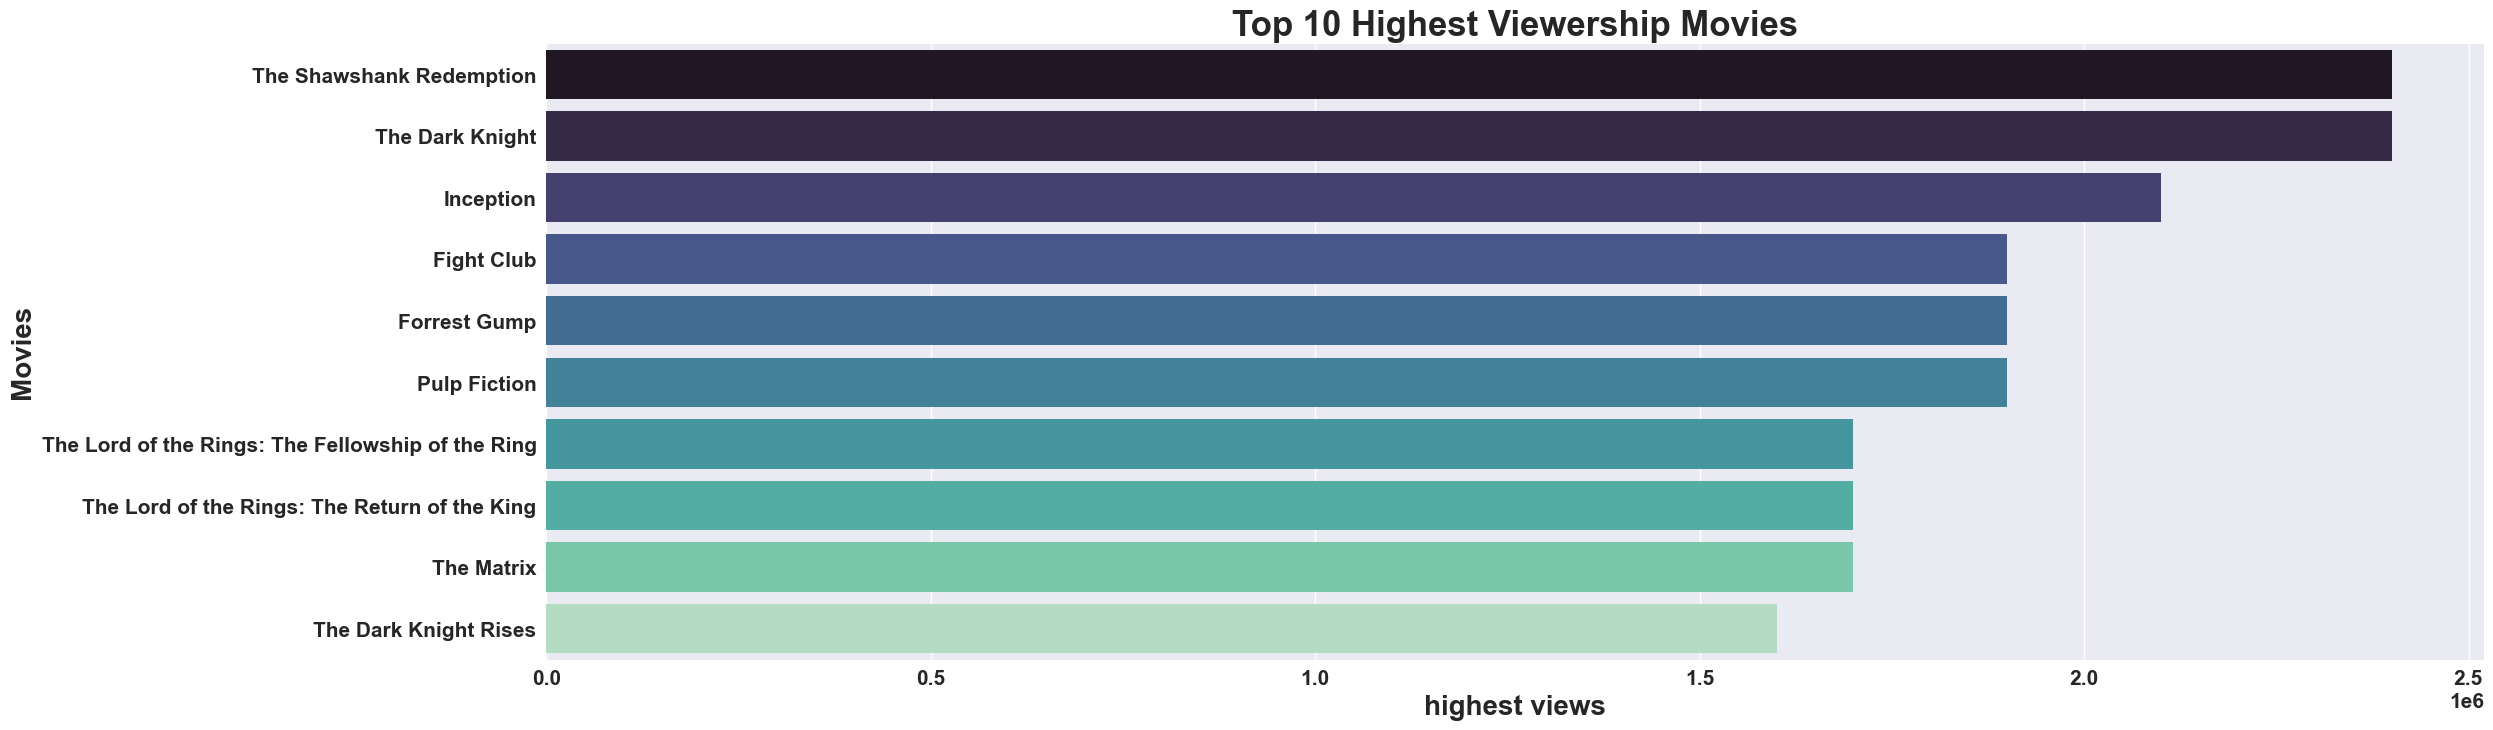

In [40]:
# 7. Top 10 movies have the highest votes?

plt.figure(figsize=(25,8))
sns.barplot(y='name',x='votes',data=df2.sort_values(by='votes',ascending=False).head(10),palette='mako')
plt.ylabel('Movies')
plt.xlabel('highest views')
plt.title('Top 10 Highest Viewership Movies')

Text(0.5, 1.0, 'Top 10 Directors In Movie Industry')

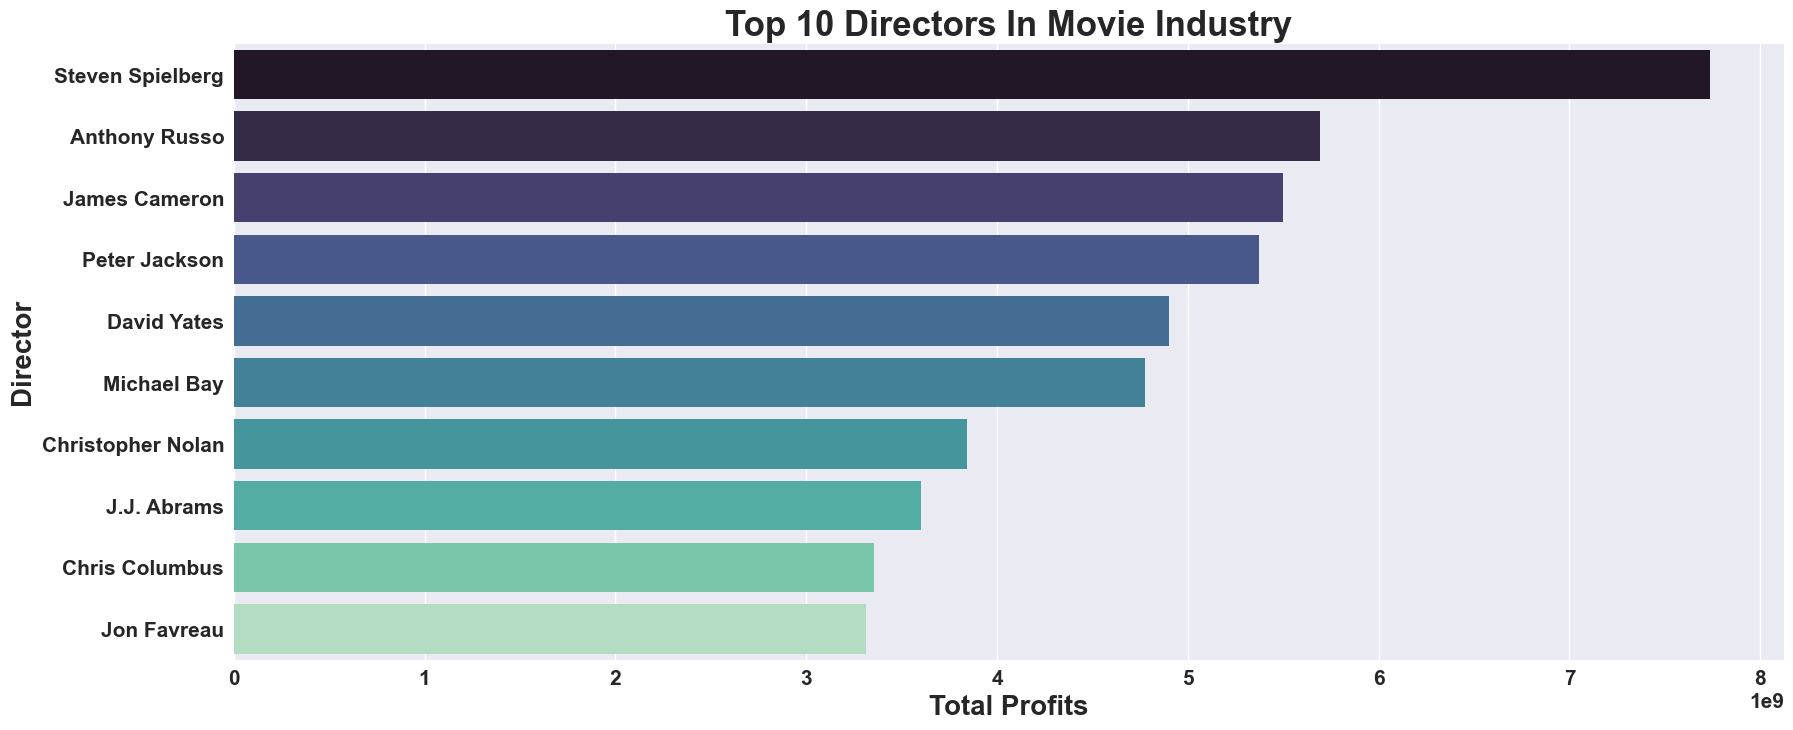

In [43]:
# 8. Who is the most successful movie director?

# 1. Tạo bảng data riêng, với cột director và sum profit từng director
data = df2.groupby('director')['profit'].sum().reset_index().rename(columns={'profit':'total_profit'}).sort_values(by='total_profit',ascending=False)[:10]

# 2. Plot dựa trên data đó
plt.figure(figsize=(20,8))
sns.barplot(y='director',x='total_profit',data=data, palette='mako')
plt.ylabel('Director')
plt.xlabel('Total Profits')
plt.title('Top 10 Directors In Movie Industry')

Text(0.5, 1.0, 'List Of Genres Have The Highest Viewership')

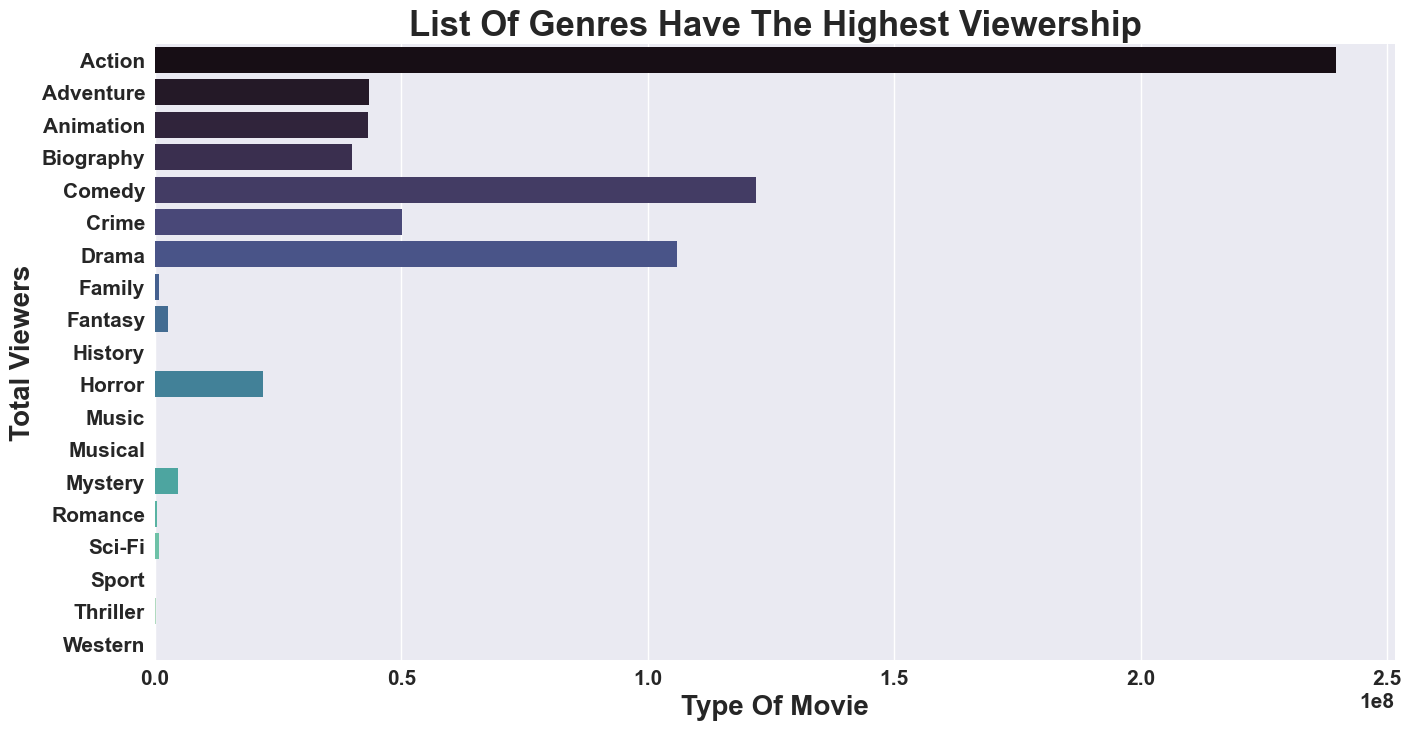

In [46]:
# 9. What types of movies have the highest viewership?

# 1. Tạo bảng data riêng, với cột genre và sum profit từng director
data = df2.groupby('genre')['votes'].agg({'sum'}).reset_index().rename(columns={'sum':'total_views'})

# 2. Plot dựa trên data đó
plt.figure(figsize=(16,8))
sns.barplot(x='total_views',y='genre',data=data,palette='mako')
plt.xlabel('Type Of Movie')
plt.ylabel('Total Viewers')
plt.title('List Of Genres Have The Highest Viewership')

Text(0.5, 1.0, 'Average Movie Rating Of Each Genre')

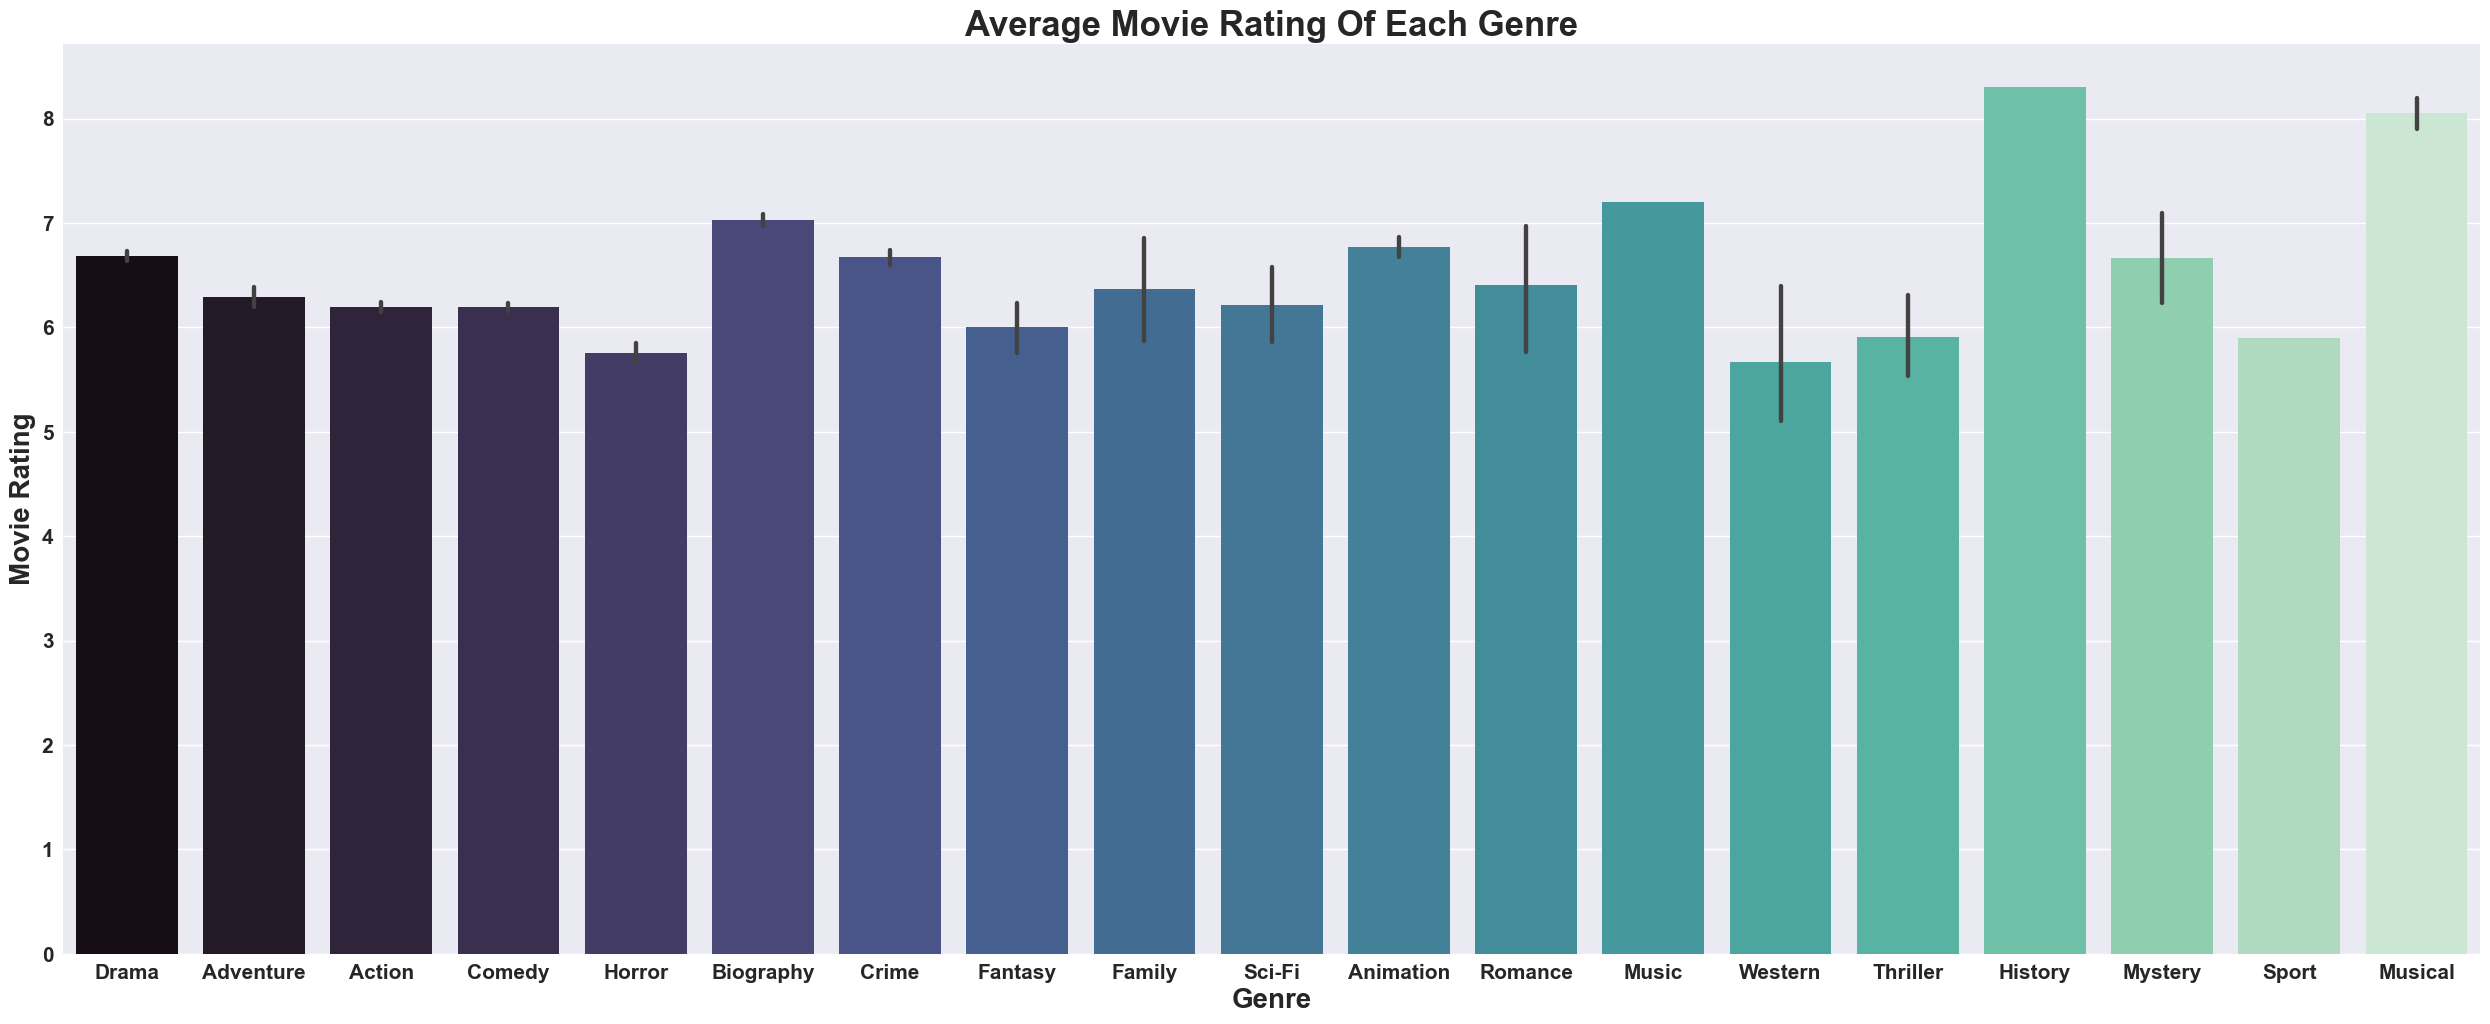

In [47]:
# 10. What is the average movie rating?

sns.catplot(x='genre', y='score', kind='bar', data=df2, height=10, aspect=2.5, palette='mako')
plt.xlabel('Genre')
plt.ylabel('Movie Rating')
plt.title('Average Movie Rating Of Each Genre')

Text(0.5, 1.0, 'Top 5 Countries produced The Total Number Of Films')

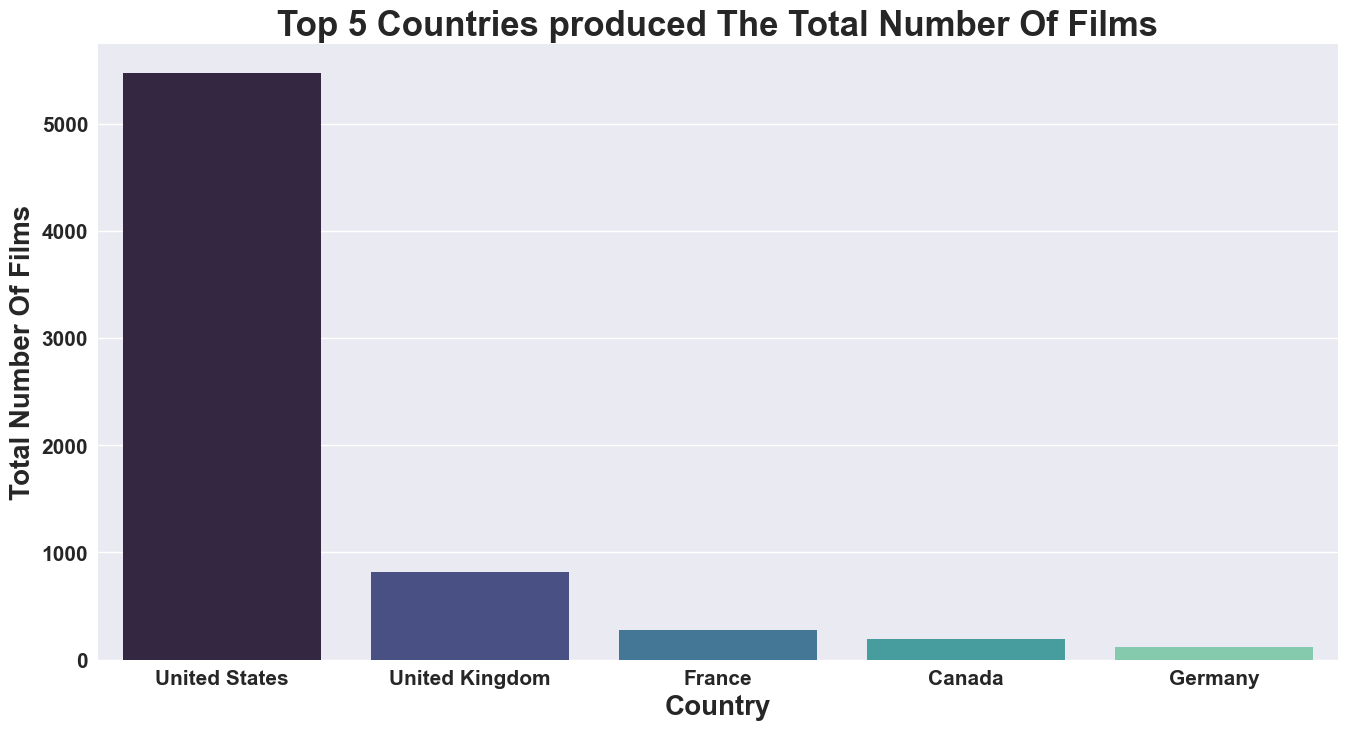

In [49]:
# 11. Which countries produce the most films?

# 1. Tạo bảng data riêng, với cột country và count film từng country
data = df2.groupby('country')['name'].agg({'count'}).reset_index().rename(columns={'count':'total_number_of_films'}).sort_values(by='total_number_of_films',ascending = False)[:5]

# 2. Plot dựa trên data đó
plt.figure(figsize=(16,8))
sns.barplot(x='country',y='total_number_of_films',data=data, palette='mako')
plt.xlabel('Country')
plt.ylabel('Total Number Of Films')
plt.title('Top 5 Countries produced The Total Number Of Films')

Text(0.5, 1.0, 'Average Gross Collection of Movies Based On Ratings')

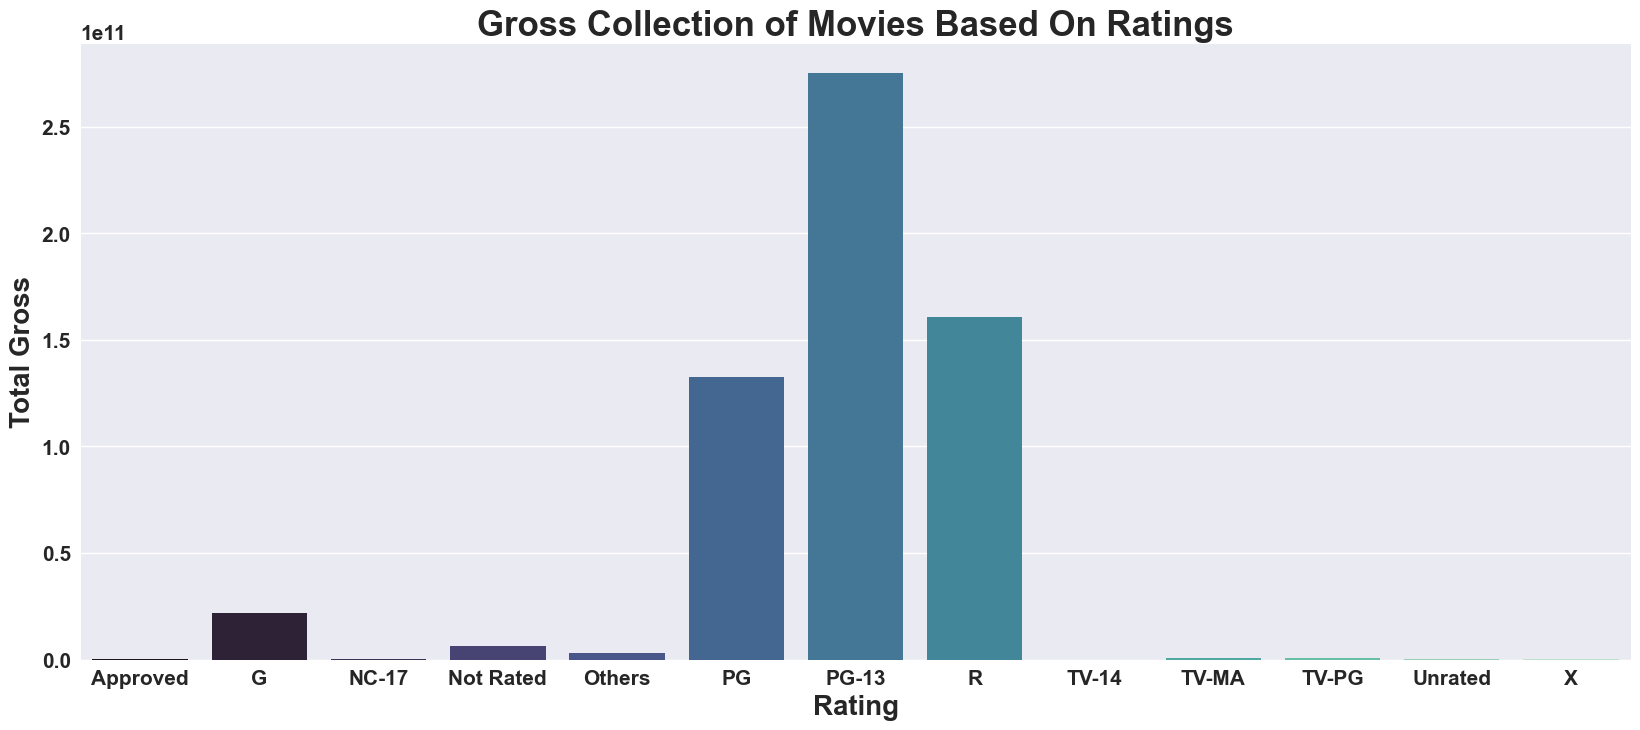

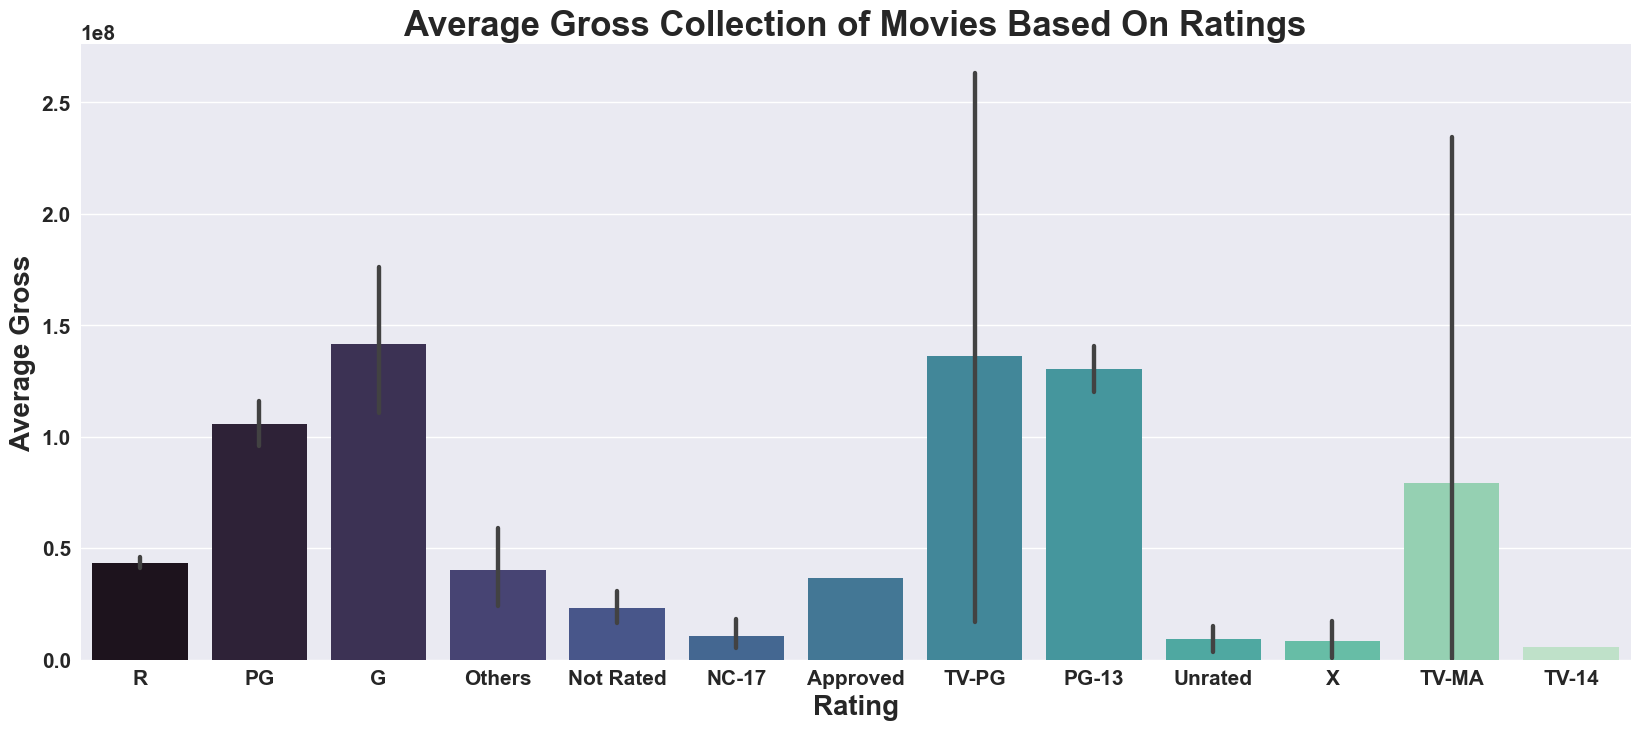

In [51]:
# 12.What is the total and avg gross collection of movies based on rating?

# 1. Tạo bảng data riêng, với cột rating và sum gross từng rating
data = df2.groupby('rating')['gross'].sum().reset_index().rename(columns={'gross':'total_gross'})

# 2. Plot gross data dựa trên data đó
plt.figure(figsize=(20,8))
sns.barplot(x='rating',y='total_gross',data=data, palette='mako')
plt.xlabel('Rating')
plt.ylabel('Total Gross')
plt.title('Gross Collection of Movies Based On Ratings')

# 3. Plot average gross cho từng rating
plt.figure(figsize=(20,8))
sns.barplot(x='rating',y='gross',data=df2, palette='mako')
plt.xlabel('Rating')
plt.ylabel('Average Gross')
plt.title('Average Gross Collection of Movies Based On Ratings')

Text(0.5, 1.0, 'Top 10 Companies In Movies Industry')

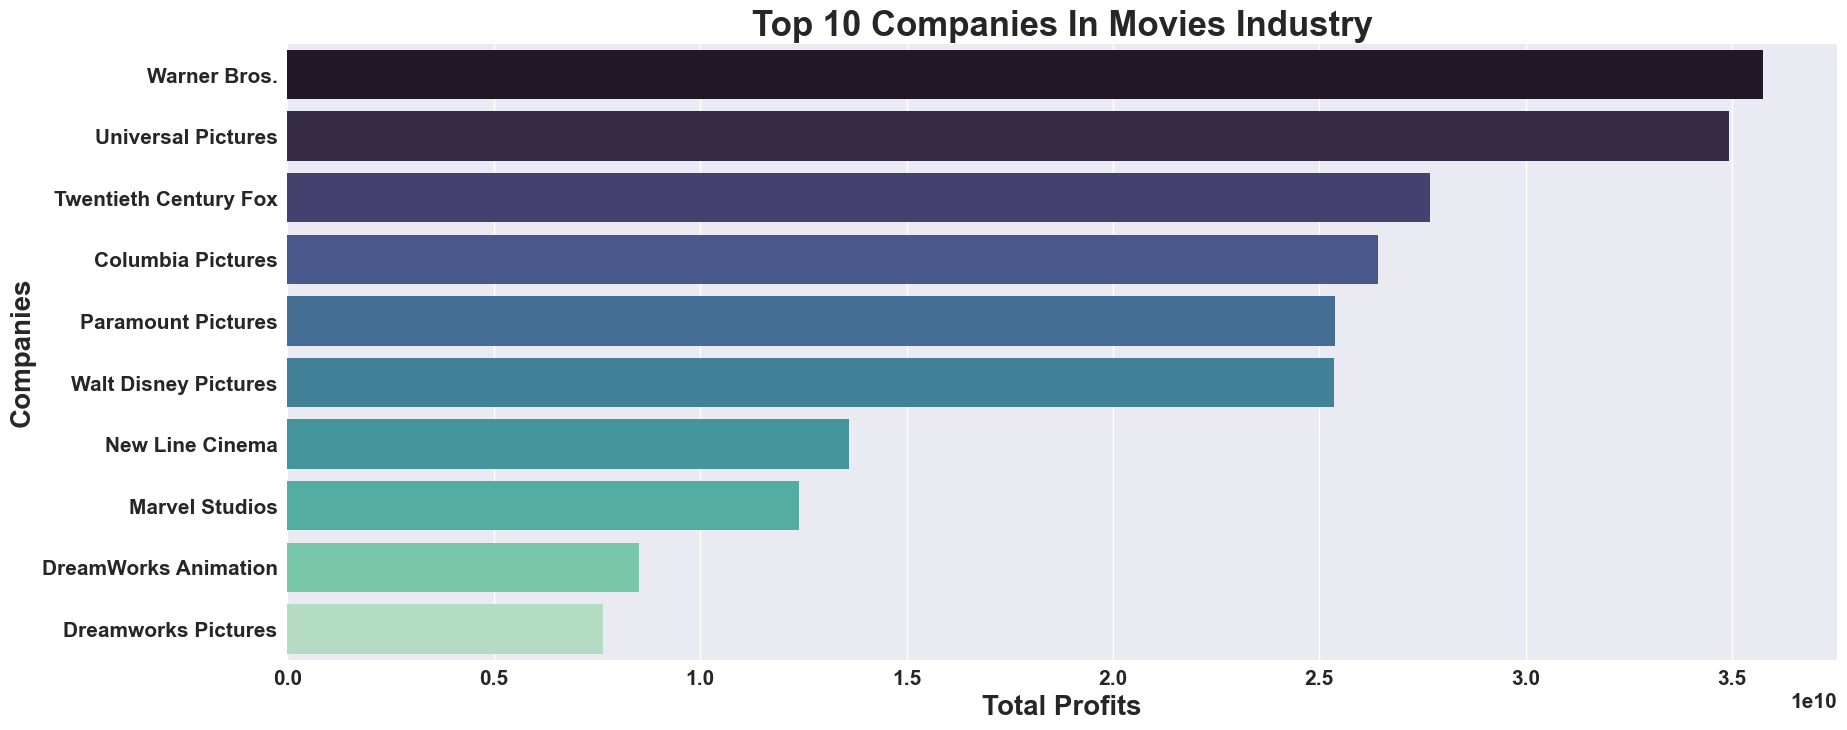

In [52]:
# 13.What are the top 10 most successful companies in movie industry?

# 1. Tạo bảng data riêng, với cột company và sum profit từng company
data = df2.groupby(['company'])['profit'].agg({'sum'}).reset_index().rename(columns={'sum':'total_profit'}).sort_values('total_profit',ascending =False)[:10]

# 2. Plot gross data dựa trên data đó
plt.figure(figsize=(20,8))
sns.barplot(y='company',x='total_profit',data=data, palette='mako')
plt.ylabel('Companies')
plt.xlabel('Total Profits')
plt.title('Top 10 Companies In Movies Industry')